In [1]:
import torch as t
import torch.nn as nn
from tqdm import tqdm
import w1d4_tests
import matplotlib.pyplot as plt
from PIL import Image
import einops

/Users/tamera/Developer/mlab/env/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


In [2]:
## Hello1 
# Yep! I am tying alright! 

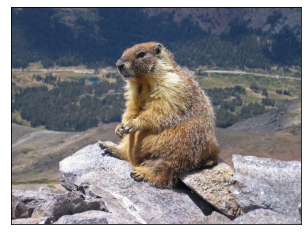

In [2]:
fname = 'marmot.jpg'
w1d4_tests.plot_image(fname)
data_train, data_test =  w1d4_tests.load_image(fname)

In [3]:
class ThreeLayerMLP(nn.Module):
    def __init__(self, P, H, K):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(P, H),
            nn.ReLU(),
            nn.Linear(H, H),
            nn.ReLU(),
            nn.Linear(H, K)
        )
        
    def forward(self, x):
         return self.layers(x)
    
w1d4_tests.test_mlp(ThreeLayerMLP)

Congrats! You've passed the test.


In [5]:
def train(model, dataloader, lr, momentum):
    optimizer = t.optim.SGD(model.parameters(), lr, momentum)
    loss_fn = nn.L1Loss()
    
    for x, y in dataloader:
        optimizer.zero_grad()
        y_hat = model(x)
        loss = loss_fn(y_hat, y)
        loss.backward()
        optimizer.step()
    
    return model

w1d4_tests.test_train(train)

Congrats! You've passed the test.


In [6]:
def evaluate(model, dataloader):
    loss_fn = nn.L1Loss()
    total_loss = 0
    for i, (x, y) in enumerate(dataloader):
        total_loss += loss_fn(model(x), y)
    
    return total_loss / (i + 1)

w1d4_tests.test_evaluate(evaluate)

Congrats! You've passed the test.


100%|██████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [02:31<00:00, 13.24it/s]


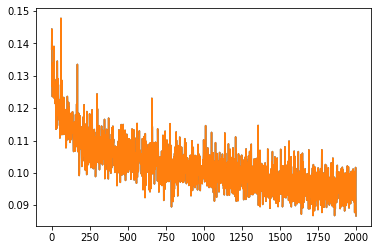

In [7]:
n_epochs = 2000
lr, momentum = 0.1, 0.5

model = ThreeLayerMLP(2, 400, 3)

train_loss, test_loss = [], []
for epoch in tqdm(range(n_epochs)):
    data_train, data_test =  w1d4_tests.load_image(fname)    
    model = train(model, data_train, lr, momentum)
    train_loss.append(evaluate(model, data_test).detach().numpy())
    test_loss.append(evaluate(model, data_test).detach().numpy())
    
plt.plot(range(n_epochs), train_loss)
plt.plot(range(n_epochs), test_loss)

In [8]:
img = Image.open(fname)
width, height = img.size
del img

x1_coords = t.linspace(-0.5, 0.5, width)
x2_coords = t.linspace(-0.5, 0.5, height)

grid = t.stack( (x1_coords.repeat((height, 1)).T, x2_coords.repeat((width, 1))) )
grid = einops.rearrange(grid, 'p w h -> (w h) p')

y_hat = model(grid)
y_hat = einops.rearrange(y_hat + 0.5, '(w h) c -> w h c', w=width)

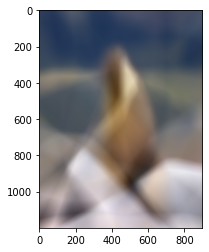

In [9]:
plt.imshow(y_hat.detach().numpy())

## Rosenbrock

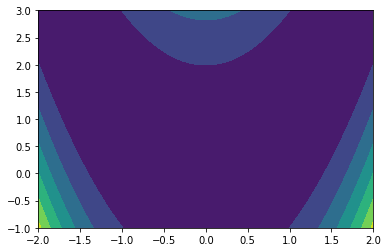

In [93]:
def f(x, y, a=1, b=100):
    return (a-x)**2 + b*(y-x**2)**2 + 1

n = 100
x_grid, y_grid = t.meshgrid(
    t.linspace(-2, 2, n), 
    t.linspace(-1, 3, n)
)

plt.contourf(x_grid, y_grid, f(x_grid, y_grid))

# Looks wrong but whatever


Testing configuration:  {'lr': 0.001, 'momentum': 0.0, 'n_iter': 10}
Congrats! You've passed the test.

Testing configuration:  {'lr': 0.001, 'momentum': 0.8, 'n_iter': 20}
Congrats! You've passed the test.


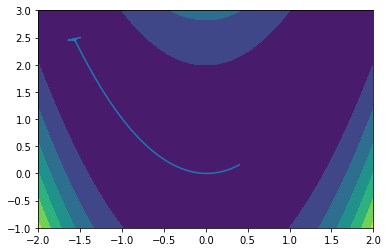

In [124]:
def opt_rosenbrock(xy, lr, momentum, n_iter):
    optimizer = t.optim.SGD([xy], lr, momentum)   
    
    vals = [xy.clone().detach()]
    for i in range(n_iter):
        optimizer.zero_grad()
        f(*xy).backward()
        optimizer.step()
        vals.append(xy.clone().detach())
    
    return t.stack(vals)

w1d4_tests.test_rosenbrock(opt_rosenbrock)

plt.contourf(x_grid, y_grid, f(x_grid, y_grid))

xy = t.Tensor([-1.5, 2.5])
xy.requires_grad = True
vals = opt_rosenbrock(xy, 0.001, 0.5, 1000)

plt.plot(*vals.T)

## Weight decay

In [111]:
vals

tensor([[-1.5000,  2.5000],
        [-1.6450,  2.4500],
        [-1.4857,  2.4962],
        [-1.6365,  2.4431],
        [-1.4925,  2.4847],
        [-1.6267,  2.4375],
        [-1.4991,  2.4745],
        [-1.6176,  2.4327],
        [-1.5053,  2.4653],
        [-1.6091,  2.4287],
        [-1.5109,  2.4571],
        [-1.6014,  2.4251],
        [-1.5160,  2.4498],
        [-1.5943,  2.4219],
        [-1.5205,  2.4431],
        [-1.5879,  2.4190],
        [-1.5244,  2.4371],
        [-1.5821,  2.4162],
        [-1.5278,  2.4315],
        [-1.5768,  2.4136],
        [-1.5307,  2.4263]])